In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv("C:\\Users\\gondu\\Downloads\\archive (10)\\breast-cancer.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [4]:
df.drop(['id'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', C=1)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')

In [6]:
from sklearn.model_selection import train_test_split
x=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

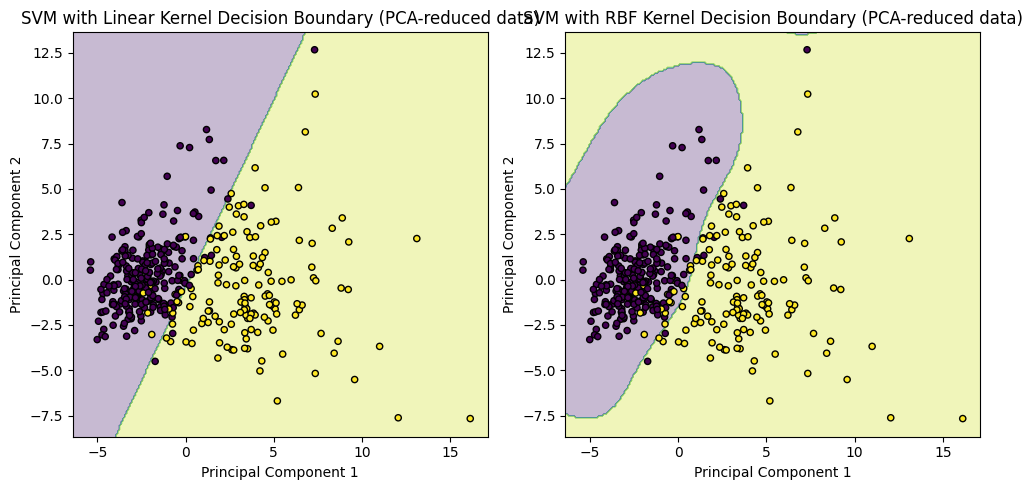

In [10]:
svm_linear.fit(x_train_pca, y_train)
svm_rbf.fit(x_train_pca, y_train)
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z_linear = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_rbf = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_linear, alpha=0.3)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, s=20, edgecolors='k')
plt.title('SVM with Linear Kernel Decision Boundary (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_rbf, alpha=0.3)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, s=20, edgecolors='k')
plt.title('SVM with RBF Kernel Decision Boundary (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
param_grid_linear = {'C': [0.1, 1, 10, 100]}
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.01, 0.1, 1]}
grid_search_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, cv=5)
grid_search_linear.fit(x_train_pca, y_train)
print( grid_search_linear.best_params_)
print( grid_search_linear.best_score_)
best_svm_linear = grid_search_linear.best_estimator_
y_pred_linear = best_svm_linear.predict(x_test_pca)
print(classification_report(y_test, y_pred_linear))
grid_search_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5)
grid_search_rbf.fit(x_train_pca, y_train)
print( grid_search_rbf.best_params_)
print(grid_search_rbf.best_score_)
best_svm_rbf = grid_search_rbf.best_estimator_
y_pred_rbf = best_svm_rbf.predict(x_test_pca)
print(classification_report(y_test, y_pred_rbf))

{'C': 1}
0.9397151898734177
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

{'C': 1, 'gamma': 'scale'}
0.9371518987341773
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [12]:
from sklearn.model_selection import cross_val_score
cv_scores_linear = cross_val_score(best_svm_linear, x_train_pca, y_train, cv=5)
cv_scores_rbf = cross_val_score(best_svm_rbf, x_train_pca, y_train, cv=5)
print(cv_scores_linear)
print(cv_scores_rbf)

[0.9375     0.9375     0.9375     0.93670886 0.94936709]
[0.9375     0.9625     0.925      0.93670886 0.92405063]
